In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


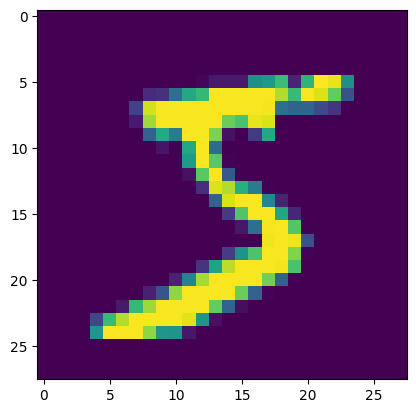

In [6]:
plt.imshow(X_train[0])

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
only_zero = X_train[y_train==0]

In [53]:
only_zero.shape

(5923, 28, 28)

In [54]:
#WE have 5923 images of diffrent zeros in this data set

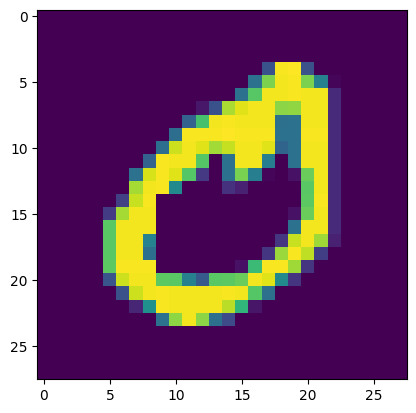

In [55]:
plt.imshow(only_zero[1])

In [56]:
only_zero = only_zero/255

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten

In [58]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(150,activation='relu'))
#Final output layer
discriminator.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
discriminator.compile(loss='binary_crossentropy',optimizer = 'adam')

In [60]:
np.random.seed(42)
tf.random.set_seed(42)
#The first layer of generator will have 100 units it looks like an decoder
coding_size = 100

In [61]:
generator= Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
GAN = Sequential([generator,discriminator])

In [63]:
discriminator.compile = False

In [64]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [65]:
batch_size = 32

In [66]:
df = only_zero

In [67]:
dataset = tf.data.Dataset.from_tensor_slices(df).shuffle(buffer_size=1000)

In [68]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [69]:
GAN.layers[0].summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 784)            │       118,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,634 (561.07 KB)

 Trainable params: 143,634 (561.07 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
GAN.layers[1].summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,551 (549.03 KB)

 Trainable params: 140,551 (549.03 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
epochs = 100

In [115]:
generator , discriminator = GAN.layers

### Training Loop

In [117]:
for epoch in range(epochs):
   # print(f'Currently on {epoch}')
    i=0
    for x_batch in dataset:
        i=i+1
       # if i%100 == 0:
        #    print(f'\t Currently on batch number {i} of {len(df)//batch_size}')
    #Discriminator training
    noise = tf.random.normal(shape=[batch_size,coding_size])
    
    gen_img = generator(noise)
    
    X_fake_real = tf.concat([gen_img,tf.dtypes.cast(x_batch,tf.float32)],axis=0)
    y1 = tf.constant([[0.0]]* batch_size + [[1.0]] * batch_size)
    
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_real,y1)
    
    #Train Generator
    
    noise = tf.random.normal(shape=[batch_size,coding_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise,y2)
print("TRAINING COMPLETE")            

TRAINING COMPLETE


In [118]:
noise = tf.random.normal(shape=[10, coding_size])

In [119]:
noise.shape

TensorShape([10, 100])

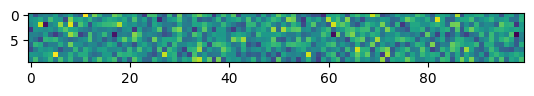

In [120]:
plt.imshow(noise)

In [121]:
image = generator(noise)

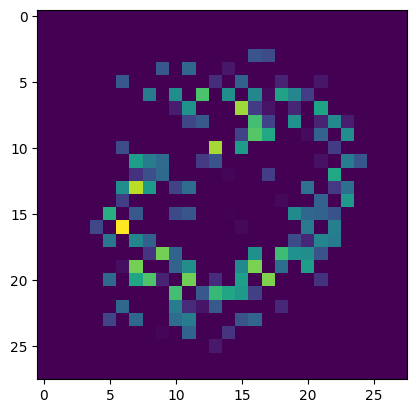

In [122]:
plt.imshow(image[6])

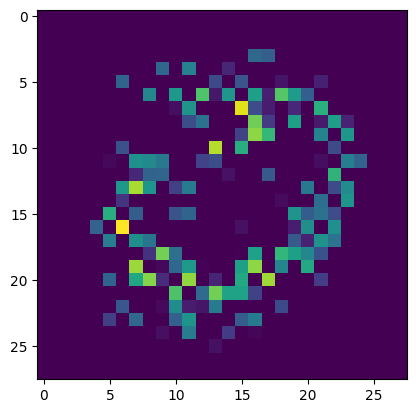

In [123]:
plt.imshow(image[1])

### Both generated images are similar 
##        MODE COLAPSE